In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.9.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 19s 4us/step


In [6]:
class_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_image.shape

NameError: name 'test_image' is not defined

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

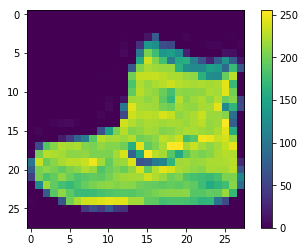

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [14]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
train_images = train_images/255.0
test_images = test_images/255.0

In [16]:
%matplotlib inline


c:\users\deepak prasad\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


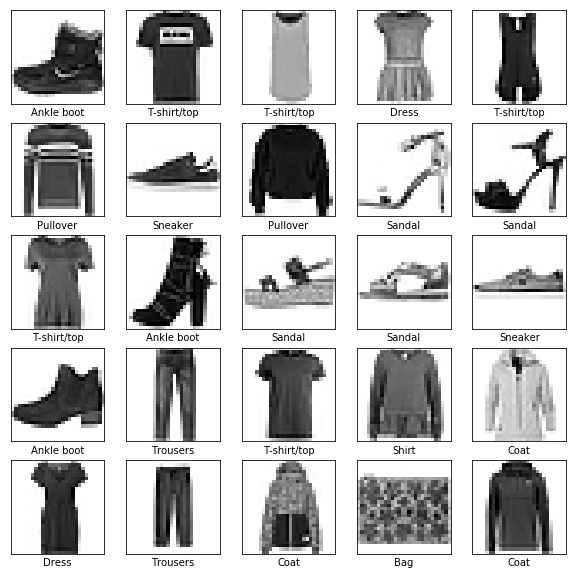

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [18]:
# Build the model

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [22]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.5003 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3767 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3380 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3151 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2945 - acc: 0.8915


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy:  0.8634


In [25]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([1.25188544e-05, 3.84983906e-07, 1.42584595e-05, 1.90749506e-06,
       2.73517617e-06, 9.52354819e-02, 2.84084654e-05, 1.33139908e-01,
       9.54779156e-04, 7.70609617e-01], dtype=float32)

In [27]:
np.argmax([predictions[0]])

9

In [28]:
test_labels[0]

9

c:\users\deepak prasad\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


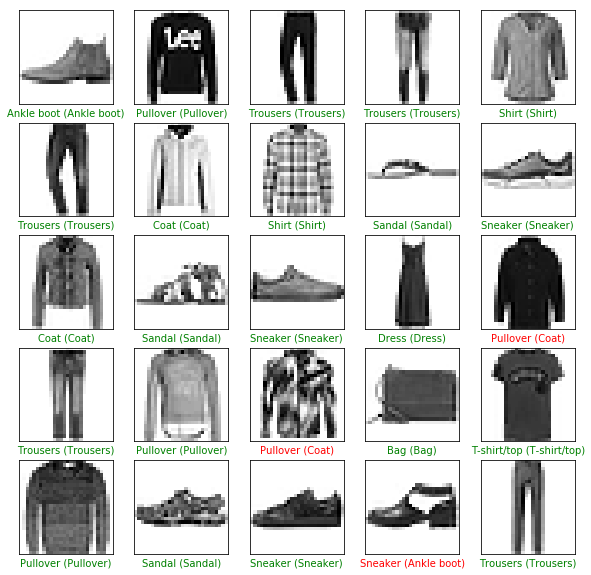

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label =np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color= 'green'
    else:
        color='red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                               class_names[true_label]),
              color=color)

In [30]:
img = test_images[0]
print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0))

In [32]:
print(img.shape)

(1, 28, 28)


In [33]:
predictions= model.predict(img)
print(predictions)

[[1.2518844e-05 3.8498365e-07 1.4258435e-05 1.9074955e-06 2.7351768e-06
  9.5235296e-02 2.8408444e-05 1.3313988e-01 9.5477846e-04 7.7060980e-01]]


In [34]:
prediction = predictions[0]

In [35]:
prediction


array([1.2518844e-05, 3.8498365e-07, 1.4258435e-05, 1.9074955e-06,
       2.7351768e-06, 9.5235296e-02, 2.8408444e-05, 1.3313988e-01,
       9.5477846e-04, 7.7060980e-01], dtype=float32)

In [36]:
np.argmax(prediction)

9